<a href="https://colab.research.google.com/github/RupeshSharma14/ML-Algorithms/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression using L2 regularization(Ridge Regression)

In [2]:
# Loading the data

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ex2data2.txt", header = None, names = ["Test1", "Test2", "Result"])

m = len(data)
X = np.array(data[["Test1", "Test2"]])
y = np.array(data["Result"]).reshape(m, 1)
X[:5]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

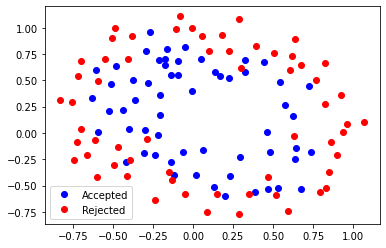

In [3]:
# Visualization of data

pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

plt.plot(X[pos, 0], X[pos, 1], "bo", label = "Accepted")
plt.plot(X[neg, 0], X[neg, 1], "ro", label = "Rejected")
plt.legend();

In [4]:
# Feature mapping

def map_feature(X1, X2, degree):
  if not type(X1) == np.ndarray:
    X1 = np.array([X1])
  
  if not type(X2) == np.ndarray:
    X2 = np.array([X2])
  
  assert X1.shape == X2. shape

  out = np.ones((len(X1), 1))
  for i in range(1, degree + 1):
    for j in range(i + 1):
      new = (X1 ** (i - j) * X2 ** j).reshape(len(X1), 1)
      out = np.hstack((out, new))
  
  return out

X = map_feature(X[:, 0], X[:, 1], degree = 6)
m, n = X.shape

In [5]:
# Z-score scaling

def scaling(X):
  X_ = X.T
  mu_ = np.zeros(len(X_))
  sigma_ = np.zeros(len(X_))
  for iter, feature in enumerate(X_):
    if iter == 0:
      continue
    mu = np.mean(feature)
    sigma = np.std(feature)
    mu_[iter] = mu
    sigma_[iter] = sigma
    X[:, iter] = feature - mu / sigma

  return X, mu_, sigma_

X, mu, sigma = scaling(X)
X[:5]

array([[ 1.        , -0.05949931,  0.34576512, -0.99776891,  0.15002466,
        -0.57429259, -0.21865051, -0.22689853, -0.07846866, -0.09598463,
        -0.58803938,  0.0546068 , -0.74122715,  0.1125986 , -0.37076236,
        -0.24294324, -0.1641235 , -0.17355369, -0.31280329, -0.02881196,
        -0.22097695, -0.40598644,  0.01211225, -0.55433001,  0.04577509,
        -0.52130239,  0.0784264 , -0.3087185 ],
       [ 1.        , -0.20350831,  0.33114512, -0.99179613,  0.05063761,
        -0.59453398, -0.21958293, -0.22284596, -0.14706716, -0.11700356,
        -0.5879723 ,  0.05396617, -0.73847827,  0.06524594, -0.39016427,
        -0.24295045, -0.16407767, -0.17399386, -0.31093927, -0.0615023 ,
        -0.23776754, -0.40598582,  0.0121073 , -0.55429869,  0.04547263,
        -0.5200388 ,  0.05585597, -0.32266852],
       [ 1.        , -0.32447631,  0.33845512, -0.95472525, -0.03378043,
        -0.58446672, -0.22854581, -0.19712077, -0.2059699 , -0.10660507,
        -0.58596035,  0.0477

In [6]:
# Sigmoid function

def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [7]:
# Cost function using L2 regularization(Ridge Regression)

def cost(X, y, theta, lambda_):
  m = len(y)
  hx = sigmoid(X @ theta)
  regularization =  lambda_ / (2 * m)  * np.sum(theta[1:] ** 2)
  cost = 1 / m * (-y.T @ np.log(hx) - (1 - y).T @ np.log(1 - hx)) 
  print(cost)
  return cost + regularization

In [8]:
# Gradient descent using L2 regularization(Ridge Regression)

def gradient(X, y, theta, alpha, lambda_, iterations):
  m = len(y)
  J_history = np.zeros((iterations, 1))
  for iter in range(iterations):
    hx = sigmoid(X @ theta)
    regularization = (lambda_ / m) * theta
    regularization[0] = 0
    theta = theta - alpha * ((1 / m) * X.T @ (hx - y) + regularization)
    J_history[iter] = cost(X, y, theta, lambda_)

  return theta, J_history

alpha = 0.12
lambda_ = 1
init_theta = np.zeros((n, 1))
iterations = 1500
theta, J_history = gradient(X, y, init_theta, alpha, lambda_, iterations)
theta[:5]

[[0.69204763]]
[[0.69106137]]
[[0.69016186]]
[[0.68932908]]
[[0.68854794]]
[[0.68780704]]
[[0.68709776]]
[[0.68641362]]
[[0.68574968]]
[[0.68510222]]
[[0.68446841]]
[[0.68384609]]
[[0.68323363]]
[[0.68262978]]
[[0.68203355]]
[[0.68144422]]
[[0.6808612]]
[[0.68028402]]
[[0.67971235]]
[[0.67914587]]
[[0.67858437]]
[[0.67802765]]
[[0.67747554]]
[[0.67692791]]
[[0.67638465]]
[[0.67584564]]
[[0.6753108]]
[[0.67478004]]
[[0.67425328]]
[[0.67373045]]
[[0.67321148]]
[[0.67269632]]
[[0.67218488]]
[[0.67167713]]
[[0.671173]]
[[0.67067243]]
[[0.67017537]]
[[0.66968178]]
[[0.66919159]]
[[0.66870476]]
[[0.66822124]]
[[0.66774099]]
[[0.66726395]]
[[0.66679008]]
[[0.66631934]]
[[0.66585169]]
[[0.66538707]]
[[0.66492545]]
[[0.66446679]]
[[0.66401104]]
[[0.66355818]]
[[0.66310814]]
[[0.66266091]]
[[0.66221644]]
[[0.66177469]]
[[0.66133563]]
[[0.66089923]]
[[0.66046544]]
[[0.66003424]]
[[0.65960558]]
[[0.65917944]]
[[0.65875579]]
[[0.65833459]]
[[0.65791581]]
[[0.65749942]]
[[0.65708539]]
[[0.65667369]]

array([[-3.0082329 ],
       [ 0.41136457],
       [ 0.9306735 ],
       [-1.5443655 ],
       [-0.76173744]])

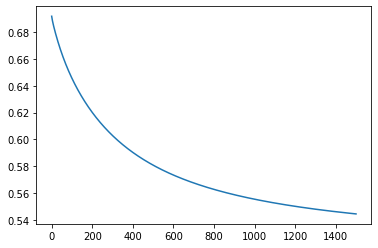

In [9]:
# Visualization of cost function

plt.plot(J_history);

In [10]:
# Accuracy

p = np.zeros((m, 1))
for (i, example) in enumerate(X):
  prob = sigmoid(np.array(example.dot(theta)))
  p[i] = 1 if prob >= 0.5 else 0

print(f"Training Accuracy: {np.mean(p == y.reshape((m, 1))) * 100}%")

Training Accuracy: 81.35593220338984%


## Linear Regression using L2 Regularization(Ridge Regression)

In [11]:
# Generating random linear data

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X = np.c_[np.ones((100, 1)), X]
m, n = X.shape

In [12]:
# L2 regularization using Normal Equation

L = np.eye(n)
L[0] = 0
lamda_ = 1
theta = np.linalg.inv(X.T @ X + lamda_ * L) @ X.T @ y

In [13]:
theta

array([[4.00834872],
       [2.82171551]])

In [14]:
# Generating data

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X +np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [15]:
# Ridge Regression using closed form solution using scikit-learn

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")  # Computing variant of normal equation using a matrix factorization technique by Andre-Louis Cholesky, can also use solver = "sag"
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [16]:
# Ridge Regression using Stochastic Gradient Descent using scikit-learn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

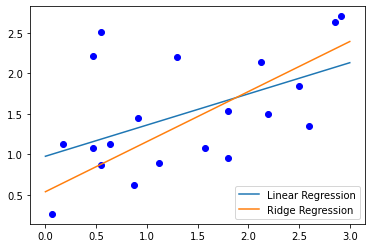

In [18]:
plt.plot(X, y, "bo")
plt.plot(X_new, lin_reg.predict(X_new), label ="Linear Regression")
plt.plot(X_new, sgd_reg.predict(X_new), label = "Ridge Regression")
plt.legend();

## Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

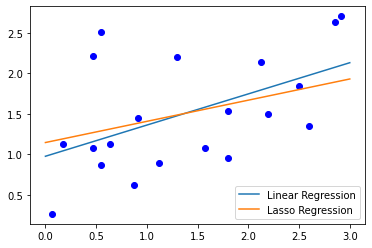

In [20]:
plt.plot(X, y, "bo")
plt.plot(X_new, lin_reg.predict(X_new), label ="Linear Regression")
plt.plot(X_new, lasso_reg.predict(X_new), label = "Lasso Regression")
plt.legend();

## Elastic Net

In [21]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

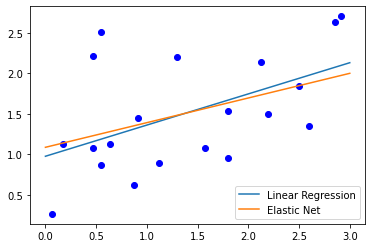

In [22]:
plt.plot(X, y, "bo")
plt.plot(X_new, lin_reg.predict(X_new), label ="Linear Regression")
plt.plot(X_new, elastic_net.predict(X_new), label = "Elastic Net")
plt.legend();